# Topic Analysis

In [1]:
#import dependencies 
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
#read data 
song_data = pd.read_csv('../content/merged_finaltop100_revised.csv') 
#remove rows with null values 
song_data = song_data.dropna()
song_data

Unnamed: 0                track_id  \
0              0  0yLdNVWF3Srea0uzk55zFn   
1              1  1Qrg8KqiBpW07V7PNxwwwL   
2              2  6AQbmUe0Qwf5PZnt4HmTXv   
3              3  0WtM2NBVQNNJLh6scP13H8   
4              4  2dHHgzDwk4BJdRwy9uXhTO   
...          ...                     ...   
7295        7295  7ErtOGQ9DwyQa3lwP77j4u   
7296        7296  4EI8VuxUuIHKfafU72emqz   
7297        7297  3Puq6i4xIRH4lrPvJxIC83   
7298        7298  7DQMBUK4oX9gV1qIzpoRz6   
7299        7299  5emv0gRnEk4dVXWETqewAC   

                                           artist_names  \
0                                           Miley Cyrus   
1                                                   SZA   
2                             PinkPantheress, Ice Spice   
3                                    Rema, Selena Gomez   
4                   Metro Boomin, The Weeknd, 21 Savage   
...                                                 ...   
7295                                              Ruger   
7296                                       Mariah Carey   
7297  Deep London, Nkosazana Daughter, Murumba Pitch...   
7298                                              Aymos   
7299                      TOSS, Young Stunna, Tyler ICU   

                                  track_name  \
0                                    Flowers   
1                                  Kill Bill   
2                         Boy's a liar Pt. 2   
3              Calm Down (with Selena Gomez)   
4     Creepin' (with The Weeknd & 21 Savage)   
...                                      ...   
7295                                 Asiwaju   
7296                      We Belong Together   
7297                       Piano Ngijabulise   
7298                                    Mama   
7299                                  Tetema   

                                  source  rank  weeks_on_chart  streams  \
0                               Columbia     1               5   124198   
1     Top Dawg Entertainment/RCA Records     2              10   106927   
2                         Warner Records     3               2    83627   
3          Mavin Records / Jonzing World     4              25    79714   
4                       Republic Records     5              11    79488   
...                                  ...   ...             ...      ...   
7295                            Columbia    96               4    54026   
7296                      Island Records    97              50    53828   
7297                          Cycad Wave    98              14    53752   
7298                      DJs Production    99              14    53733   
7299                   Toss Indabakabani   100               2    53252   

                   country  danceability  ...  duration_ms  time_signature  \
0     United Arab Emirates         0.707  ...     200455.0             4.0   
1     United Arab Emirates         0.644  ...     153947.0             4.0   
2     United Arab Emirates         0.696  ...     131013.0             4.0   
3     United Arab Emirates         0.801  ...     239318.0             4.0   
4     United Arab Emirates         0.715  ...     221520.0             4.0   
...                    ...           ...  ...          ...             ...   
7295          South Africa         0.727  ...     216000.0             4.0   
7296          South Africa         0.840  ...     201400.0             4.0   
7297          South Africa         0.835  ...     416037.0             4.0   
7298          South Africa         0.802  ...     450304.0             4.0   
7299          South Africa         0.835  ...     378979.0             4.0   

      album_release_date                                             lyrics  \
0             2023-01-13  We were good, we were gold\nKinda dream that c...   
1             2022-12-08  I'm still a fan even though I was salty\nHate ...   
2             2023-02-03  Take a look inside your heart\nIs there any ro...   
3             2022-08-25  Vibez\nOh, 

In [4]:
#unqiue tokens
text = ' '.join(song_data['lyrics_clean']).split() 
new_set = set(text)
print("# of unique tokens:", len(new_set))

# of unique tokens: 11007


In [5]:
import multiprocessing
multiprocessing.cpu_count() #check how many cpu workers are available

2

## I. Latent Dirichlet Allocation (LDA)

In [9]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('punkt')
import gensim.corpora as corpora
from pprint import pprint
import pickle 
import pyLDAvis
import time
import os
from gensim.models import LdaMulticore
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
#tokenize the text
tokenized_lyrics = [nltk.word_tokenize(text) for text in song_data['lyrics_clean']]

#convert the tokenized object into a corpus and dictionary
id2word  = corpora.Dictionary(tokenized_lyrics) #create dict 
print(id2word.token2id) 

{'also': 0, 'baby': 1, 'better': 2, 'build': 3, 'burn': 4, 'buy': 5, 'cry': 6, 'dance': 7, 'didnt': 8, 'dream': 9, 'every': 10, 'fight': 11, 'flower': 12, 'forgive': 13, 'gold': 14, 'good': 15, 'hand': 16, 'hold': 17, 'home': 18, 'hour': 19, 'leave': 20, 'lie': 21, 'like': 22, 'love': 23, 'match': 24, 'might': 25, 'nail': 26, 'name': 27, 'paint': 28, 'regret': 29, 'remorse': 30, 'right': 31, 'rise': 32, 'sand': 33, 'say': 34, 'sell': 35, 'take': 36, 'talk': 37, 'thing': 38, 'til': 39, 'understand': 40, 'watch': 41, 'word': 42, 'write': 43, 'yeah': 44, 'alone': 45, 'amazement': 46, 'beat': 47, 'best': 48, 'broad': 49, 'cause': 50, 'crime': 51, 'damn': 52, 'drug': 53, 'even': 54, 'evidence': 55, 'fan': 56, 'farmer': 57, 'get': 58, 'gon': 59, 'happy': 60, 'hate': 61, 'hell': 62, 'idea': 63, 'jail': 64, 'know': 65, 'lose': 66, 'low': 67, 'market': 68, 'mature': 69, 'men': 70, 'murder': 71, 'new': 72, 'next': 73, 'none': 74, 'one': 75, 'passion': 76, 'patience': 77, 'peach': 78, 'perfect': 

In [11]:
#filter out very low-frequency and high-frequency tokens
id2word.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)
print(len(id2word.token2id))

1000


In [12]:
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in tokenized_lyrics]
# View
print(corpus[:1][0][:20])

[(0, 9), (1, 23), (2, 1), (3, 1), (4, 3), (5, 3), (6, 3), (7, 6), (8, 1), (9, 1), (10, 2), (11, 3), (12, 1), (13, 1), (14, 1), (15, 3), (16, 3), (17, 1), (18, 3), (19, 4)]


**Choose optimal topic size**

In [ ]:
%%time 
topics = []
score = []
for i in range(1,20,1):
    lda_model = LdaMulticore(corpus=corpus, id2word=id2word, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)
    cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=id2word, coherence='u_mass')
    topics.append(i)
    score.append(cm.get_coherence())
plt.plot(topics, score)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score (u_mass)')
plt.title('Figure 5.1: Number of topics vs. Coherence score')
plt.show()

U_Mass calculates how often two words appear together, and averages the pairwise coherence scores over the top N words for each topic. For UMass, the higher the score, the better the performance. 

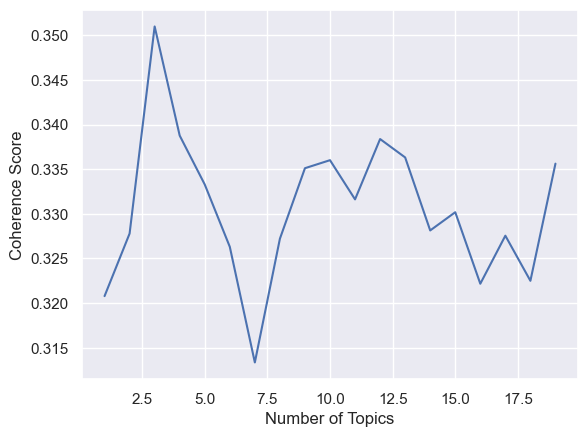

CPU times: total: 2min 12s
Wall time: 5min 48s


In [ ]:
%%time 
topics = []
score = []
for i in range(1,20,1):
    lda_model = LdaMulticore(corpus=corpus, id2word=id2word, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)
    cm = CoherenceModel(model=lda_model, texts = tokenized_lyrics, corpus=corpus, dictionary=id2word, coherence='c_v')
    topics.append(i)
    score.append(cm.get_coherence())
plt.plot(topics, score)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score (u_mass)')
plt.title('Figure 5.2: Number of topics vs. Coherence score')
plt.show()

C_V measures how often topic words appear together in the corpus. It creates content vectors of words using their co-occurrences and then computes the score using NPMI and the cosine similarity.


**Fit LDA with optimal topic size**

In [ ]:
%%time
lda_model = gensim.models.LdaMulticore(corpus=corpus,id2word=id2word,num_topics=4)

CPU times: total: 3.42 s
Wall time: 5.98 s


In [ ]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.026*"yeah" + 0.018*"come" + 0.017*"baby" + 0.014*"say" + 0.013*"would" + '
  '0.012*"take" + 0.012*"go" + 0.012*"time" + 0.010*"back" + 0.010*"cause"'),
 (1,
  '0.013*"hey" + 0.013*"make" + 0.012*"take" + 0.012*"say" + 0.011*"feel" + '
  '0.011*"tell" + 0.010*"night" + 0.010*"heart" + 0.010*"back" + 0.010*"go"'),
 (2,
  '0.026*"yeah" + 0.017*"make" + 0.015*"let" + 0.014*"time" + 0.014*"say" + '
  '0.013*"baby" + 0.013*"come" + 0.012*"tell" + 0.012*"feel" + 0.010*"night"'),
 (3,
  '0.024*"baby" + 0.016*"hey" + 0.014*"yeah" + 0.014*"look" + 0.013*"give" + '
  '0.012*"tell" + 0.012*"say" + 0.011*"never" + 0.011*"better" + 0.011*"come"')]


In [ ]:
for topic_id, topic in lda_model.print_topics(num_topics=10):
    print(f"Topic {topic_id}: {topic}")

Topic 0: 0.026*"yeah" + 0.018*"come" + 0.017*"baby" + 0.014*"say" + 0.013*"would" + 0.012*"take" + 0.012*"go" + 0.012*"time" + 0.010*"back" + 0.010*"cause"
Topic 1: 0.013*"hey" + 0.013*"make" + 0.012*"take" + 0.012*"say" + 0.011*"feel" + 0.011*"tell" + 0.010*"night" + 0.010*"heart" + 0.010*"back" + 0.010*"go"
Topic 2: 0.026*"yeah" + 0.017*"make" + 0.015*"let" + 0.014*"time" + 0.014*"say" + 0.013*"baby" + 0.013*"come" + 0.012*"tell" + 0.012*"feel" + 0.010*"night"
Topic 3: 0.024*"baby" + 0.016*"hey" + 0.014*"yeah" + 0.014*"look" + 0.013*"give" + 0.012*"tell" + 0.012*"say" + 0.011*"never" + 0.011*"better" + 0.011*"come"


In [ ]:
import pyLDAvis.gensim_models 
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

C:\Users\kayan\Anaconda3\envs\py310\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.018543  0.011333       1        1  28.716004
2      0.016933  0.009057       2        1  25.858310
1     -0.003194 -0.019348       3        1  24.089700
0      0.004804 -0.001042       4        1  21.335986, topic_info=       Term          Freq         Total Category  logprob  loglift
40     yeah  14077.000000  14077.000000  Default  30.0000  30.0000
302     hey   7740.000000   7740.000000  Default  29.0000  29.0000
1    better   3926.000000   3926.000000  Default  28.0000  28.0000
123   would   5861.000000   5861.000000  Default  27.0000  27.0000
147    make   8501.000000   8501.000000  Default  26.0000  26.0000
..      ...           ...           ...      ...      ...      ...
139    give   1168.700714   6749.907515   Topic4  -4.9398  -0.2089
310  always    753.546393   3273.037366   Topic4  -5.3786   0.0761
95     feel   1100.859590   7537.437954   Topic4  -4.9996  -0.3790
49     even    927.038654   5496.294864   Topic4  -5.1714  -0.2351
147    make   1018.522044   8501.637727   Topic4  -5.0773  -0.5771

[301 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
208       1  0.085686  actin
208       2  0.246348  actin
208       3  0.503407  actin
208       4  0.160662  actin
175       1  0.132328   aint
...     ...       ...    ...
877       4  0.310283    yes
329       1  0.271370  youve
329       2  0.446376  youve
329       3  0.134024  youve
329       4  0.149531  youve

[796 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 2, 1])

*Figure 5.3: LDA Plots*

In [ ]:
#compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_lyrics, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('nCoherence Score: ', coherence_lda)

nCoherence Score:  0.31914566588006454


In [ ]:
#compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_lyrics, dictionary=id2word, coherence='u_mass')
coherence_lda = coherence_model_lda.get_coherence()
print('nCoherence Score: ', coherence_lda)

Unsupervised topic modelling does not seem to work very well with song lyrics data since there's low diversity of words in lyrics of current top hits

## II. BERTopic

In [9]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from umap import UMAP
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
from gensim.models import CoherenceModel

In [10]:
doc = song_data['lyrics_clean'].tolist()

In [13]:
#prep embeddings 
sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = sentence_model.encode(doc, show_progress_bar=False)

#train BERTopic model
topic_model = BERTopic().fit(doc, embeddings)

In [18]:
topic_model.visualize_topics()

*Figure 5.4: BERTopic Intertopic Distance Map*

In [17]:
topic_model.visualize_barchart()

*Figure 5.5: BERTopic Topic Word Scores*

In [15]:
topic_model.visualize_documents(doc, embeddings=embeddings)

*Figure 5.6: BERTopic Documents & Topics*

In [16]:
reduced_embeddings = UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
topic_model.visualize_documents(doc, reduced_embeddings=reduced_embeddings)

*Figure 5.7: BERTopic Documents & Topics with Reduced Embeddings*

**Coherence Scores**

In [21]:
#preprocess Documents
documents = pd.DataFrame({"Document": doc,
                          "ID": range(len(doc)),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

In [45]:
#extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

#extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [ [words for words, _ in topic_model.get_topic(topic)] for topic in range(len(set(topics))-2)]

NameError: ignored

In [46]:
#evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_v')
coherence = coherence_model.get_coherence()
coherence


0.5183358846533294

In [47]:
#evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='u_mass')
coherence = coherence_model.get_coherence()
coherence

-0.8754939665262886

## III. Top2Vec

In [3]:
import multiprocessing

In [4]:
from top2vec import Top2Vec

In [5]:
doc= song_data["lyrics_clean"].values.tolist()

In [ ]:
!pip install tensorflow tensorflow_hub tensorflow_text

In [24]:
%%time
#train with slowest learning rate (deep=learn)
top2vec = Top2Vec(doc, embedding_model="universal-sentence-encoder",
                  speed="deep-learn", ngram_vocab=True,
                  ngram_vocab_args={"connector_words": "phrases.ENGLISH_CONNECTOR_WORDS"}, 
                  workers=multiprocessing.cpu_count())

2023-03-08 23:48:15,282 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2023-03-08 23:48:31,077 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2023-03-08 23:48:39,876 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-03-08 23:48:48,066 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2023-03-08 23:49:11,148 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-03-08 23:49:11,473 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


CPU times: user 1min 5s, sys: 3.4 s, total: 1min 8s
Wall time: 56.5 s


In [13]:
#total number of topics
top2vec.get_num_topics()

125

In [64]:
top2vec.get_topics()

(array([['learn ballad', 'cry beg', 'poem fall', ..., 'wait patiently',
         'hug everywhere', 'sorrow begin'],
        ['poppin', 'jiggy jiggy', 'song poppin', ..., 'actin naughty',
         'grind chop', 'lullaby choke'],
        ['cry beg', 'wake desire', 'lullaby choke', ..., 'deserve lover',
         'suck suck', 'suck smash'],
        ...,
        ['bad memory', 'forgetfulness happen', 'will liquor', ...,
         'bleed death', 'hard liquor', 'kiss disaster'],
        ['safe safe', 'keep safe', 'safe sound', ..., 'teardrop fall',
         'feat dean', 'run bulletproof'],
        ['remember yesterday', 'send music', 'mourn mourn', ...,
         'realize well', 'heart glow', 'amor']], dtype='<U25'),
 array([[0.30762494, 0.2911715 , 0.28021342, ..., 0.21185015, 0.21178201,
         0.2109958 ],
        [0.27774128, 0.27477336, 0.25841653, ..., 0.1986558 , 0.19845141,
         0.19789112],
        [0.24927759, 0.24156025, 0.24144508, ..., 0.19047771, 0.1903212 ,
         0.19008

In [14]:
# Get topic size (number of documents in each topic)
topic_sizes, topic_nums = top2vec.get_topic_sizes()
topic_sizes

array([693, 676, 223, 175, 140, 133, 120, 114, 111, 110, 106,  93,  89,
        85,  83,  80,  75,  74,  74,  73,  70,  69,  68,  67,  67,  67,
        66,  58,  56,  54,  54,  53,  52,  52,  50,  49,  49,  48,  48,
        46,  46,  45,  45,  45,  42,  42,  41,  40,  40,  39,  38,  38,
        38,  37,  35,  34,  34,  34,  34,  34,  33,  33,  33,  33,  32,
        32,  32,  32,  31,  31,  31,  30,  29,  29,  29,  29,  29,  29,
        29,  28,  27,  27,  26,  26,  26,  26,  25,  25,  25,  24,  24,
        24,  23,  23,  23,  23,  22,  22,  22,  22,  21,  21,  21,  20,
        20,  20,  20,  19,  19,  19,  19,  19,  19,  18,  18,  18,  18,
        18,  17,  17,  17,  16,  16,  15,  14])

In [66]:
for topic_size, topic_num in zip(topic_sizes[:10], topic_nums[:10]):
    print(f"Topic Num {topic_num} has {topic_size} documents.")

Topic Num 0 has 693 documents.
Topic Num 1 has 676 documents.
Topic Num 2 has 223 documents.
Topic Num 3 has 175 documents.
Topic Num 4 has 140 documents.
Topic Num 5 has 133 documents.
Topic Num 6 has 120 documents.
Topic Num 7 has 114 documents.
Topic Num 8 has 111 documents.
Topic Num 9 has 110 documents.


In [15]:
#keywords for each topic
top2vec.topic_words

array([['jiggy jiggy', 'poppin', 'kiss deceive', ..., 'sit cock',
        'push pus', 'sing lullaby'],
       ['learn ballad', 'cry beg', 'poem fall', ..., 'taffy forgive',
        'swim silence', 'sorrow begin'],
       ['rhyme', 'suck suck', 'lullaby choke', ..., 'cheat throw',
        'whore', 'grr'],
       ...,
       ['bad memory', 'forgetfulness happen', 'will liquor', ...,
        'bleed death', 'hard liquor', 'kiss disaster'],
       ['tonight oxygen', 'breathe breathe', 'breathe', ...,
        'song butterfly', 'jump cover', 'heart glow'],
       ['pay gym', 'must hustle', 'walk woof', ..., 'grind',
        'buttock squeeze', 'beat fast']], dtype='<U25')

In [68]:
#check first 2 topic with most docs
print(top2vec.topic_words[0])
print(top2vec.topic_words[1])

['learn ballad' 'cry beg' 'poem fall' 'mourn mourn' 'write poem'
 'hide emotion' 'lullaby choke' 'heartbreak anniversary' 'amor'
 'think linger' 'kiss disaster' 'tattoo amor' 'fade fade'
 'sit sentimental' 'deserve lover' 'cry' 'heart adore' 'sing lullaby'
 'rest peace' 'wake desire' 'devotion deep' 'smile mockingbird'
 'eternal sadness' 'tear describe' 'lyric' 'summertime sadness'
 'sunrise moonlight' 'scarf amor' 'sorrow many' 'monotonous rhythm'
 'teardrop fall' 'disappear unthinkable' 'kiss deceive' 'song butterfly'
 'trouble sentimental' 'lionheart heart' 'rain khair' 'difficult cry'
 'heal wind' 'temptation whim' 'wind caress' 'beg pardon' 'moony tune'
 'snooze miss' 'tear drop' 'sit humbly' 'envy silent' 'wait patiently'
 'hug everywhere' 'sorrow begin']
['poppin' 'jiggy jiggy' 'song poppin' 'whore whore' 'make rowdy' 'rhyme'
 'fag blow' 'suck nymphet' 'beg pardon' 'wick wack' 'kiss deceive'
 'must hustle' 'pistol poppin' 'suck savage' 'dum dam' 'suck suck'
 'loser loser' 'snatc

In [69]:
#reduce number of topics to 10
top2vec.hierarchical_topic_reduction(num_topics=10)
print(top2vec.topic_words_reduced[0]) #updated list of keywords for topic 0
print(top2vec.topic_words_reduced[1]) #updated list of keywords for topic 1

['jiggy jiggy' 'poppin' 'song poppin' 'rhyme' 'whore whore'
 'lullaby choke' 'suck nymphet' 'mambo bad' 'beg pardon' 'kiss deceive'
 'cry beg' 'fail moan' 'suck suck' 'naughty desire' 'lyric' 'scratch yell'
 'back poppin' 'make rowdy' 'touch ditty' 'monotonous rhythm'
 'actin naughty' 'learn ballad' 'kiss disaster' 'fag blow' 'suck savage'
 'drop drop' 'mess groove' 'rain bop' 'wick wack' 'guess slut' 'poem fall'
 'dum dam' 'sing lullaby' 'must hustle' 'pistol poppin'
 'succulent succulent' 'taffy forgive' 'tuck jewel' 'suck smash'
 'temptation whim' 'trick feint' 'pull tune' 'bonbon grape' 'sex repeat'
 'cheat throw' 'snatch snatch' 'loser loser' 'naughty' 'sing toto'
 'listen song']
['cry beg' 'sing lullaby' 'sit humbly' 'lullaby choke' 'wake desire'
 'jiggy jiggy' 'wake scream' 'learn ballad' 'suck nymphet' 'sit cock'
 'kiss deceive' 'scream' 'pray god' 'lick lick' 'tell dumb'
 'sit sentimental' 'smile mockingbird' 'listen song' 'darling expect'
 'wait patiently' 'closer whisper' 's

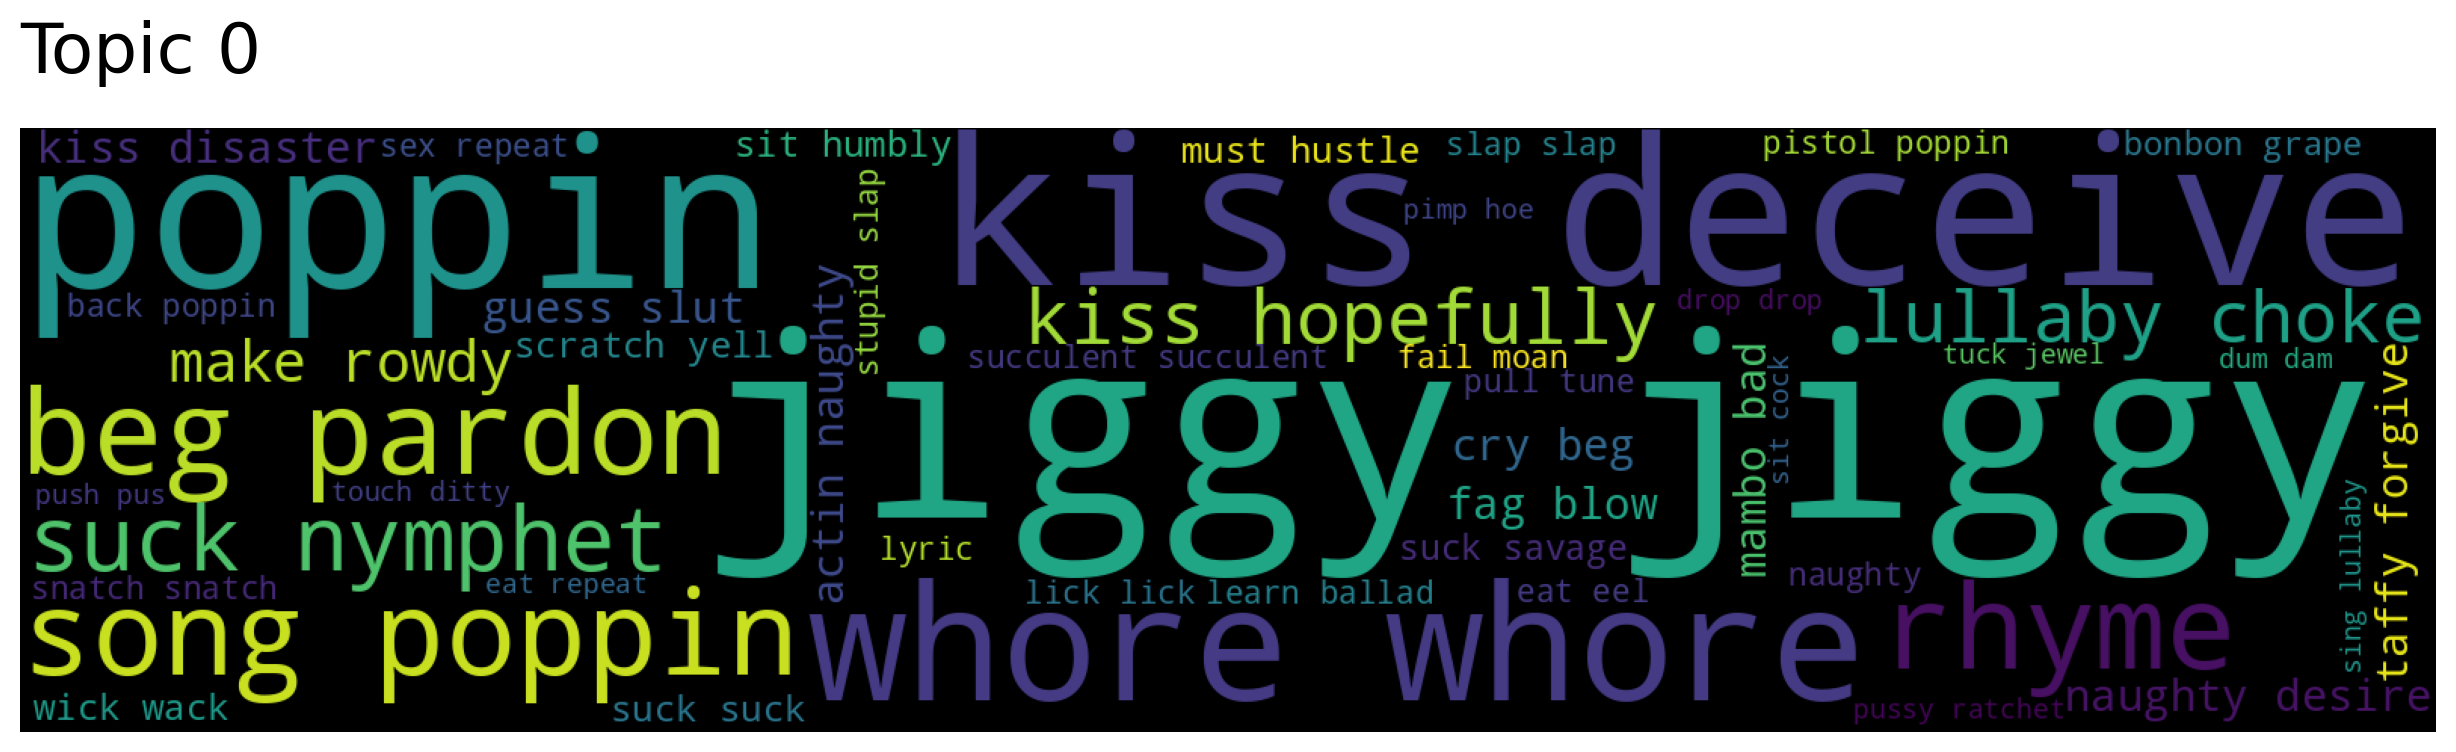

In [20]:
top2vec.generate_topic_wordcloud(0)

*Figure 5.8: Top2vec Topic 0 Top words*

In [70]:
#search for a sample topic 0 document
top2vec.search_documents_by_topic(0, num_docs=2)

(array(['tell stay side promise day fragile could much make love fade away heartache song use hum together pick accident make tear well baby miss every day always mind make break many day lonely day miss day love even though want ever earnest see rush dream understand first day say let make cry much eye swell mind today mind confuse heart ache knee hand day walk side side wait way back maybe do there nothing leave connect love story bitter meet choose love wind carry apart ache heart quickly wipe eye tomorrow forget might also like sadness hide alone night reply write message line wonder long time understand give wholeheartedly lie say let',
        'like raindrop fall winter lake cold heart sadness speechless see remember rainy afternoon laugh together much fun know know meet time sit next last time know say incompatible know blue sky tomorrow become late star let think every night time keep precious memory one delete promise make cool windy afternoon please engrave farewell word coul

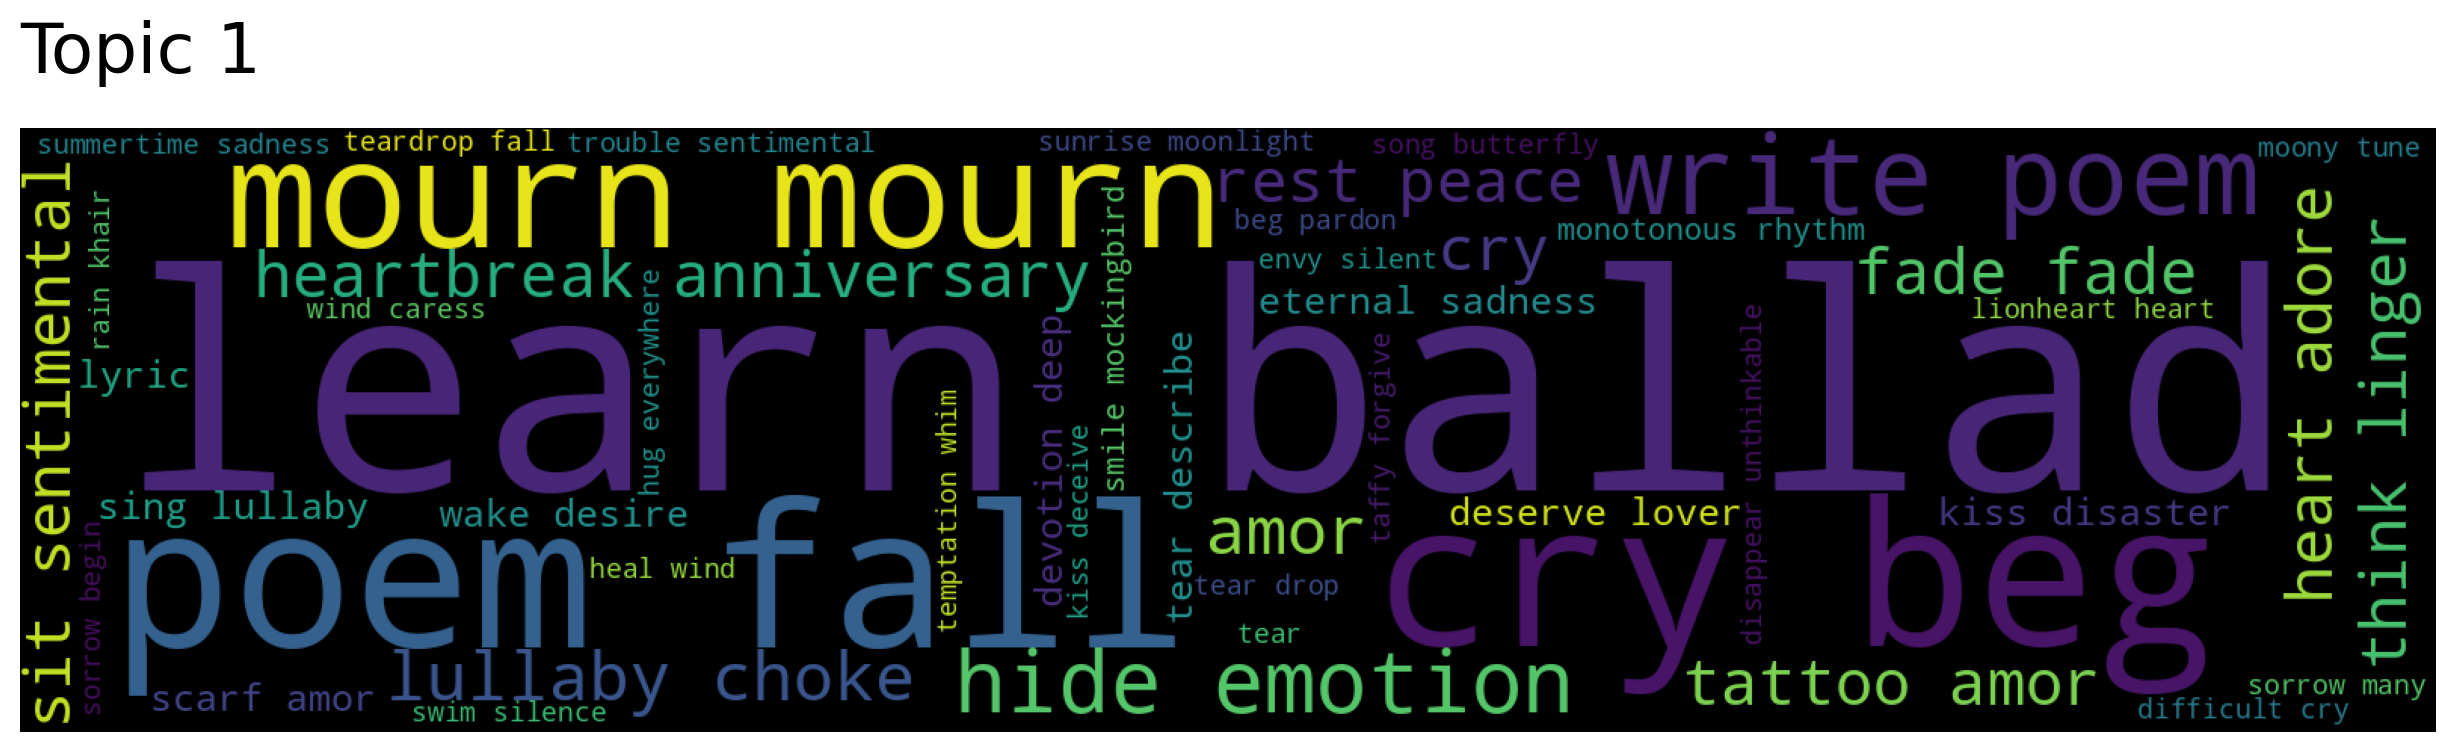

In [21]:
top2vec.generate_topic_wordcloud(1)

*Figure 5.9: Top2vec Topic 1 Top words*

In [71]:
#search for a sample topic 1 document
top2vec.search_documents_by_topic(1, num_docs=2)

(array(['wake morning hallelujah money bag back gang steady fire leave gap mix monster eye dirty fit see smell do shall lead baby girl clean tear currency bullion van outside club tell say need protection hop black challenger road leadin dynasty know ourself know know tin tin tin money long make bless seize sha guy lady lady lady pull pool party torus order might also like pull brand new beamer know money like river dey get liver aint nobody bigger pelu yeah come spray pepper spray pepper yeah know say regular dey give keep hot like summer bring drama burst medulla automatic want party bring like twenty show place new designer steady everything get god grace make bless seize yes yeah sha thing say rap sell til start pay money come back track play get need application fee track make pastor pray cause know high take like park chart vacancy want patiently step room energy wey carry enter never lose know dish chop far go fit fathom nothing close random dey beg pardon leave right dribble li

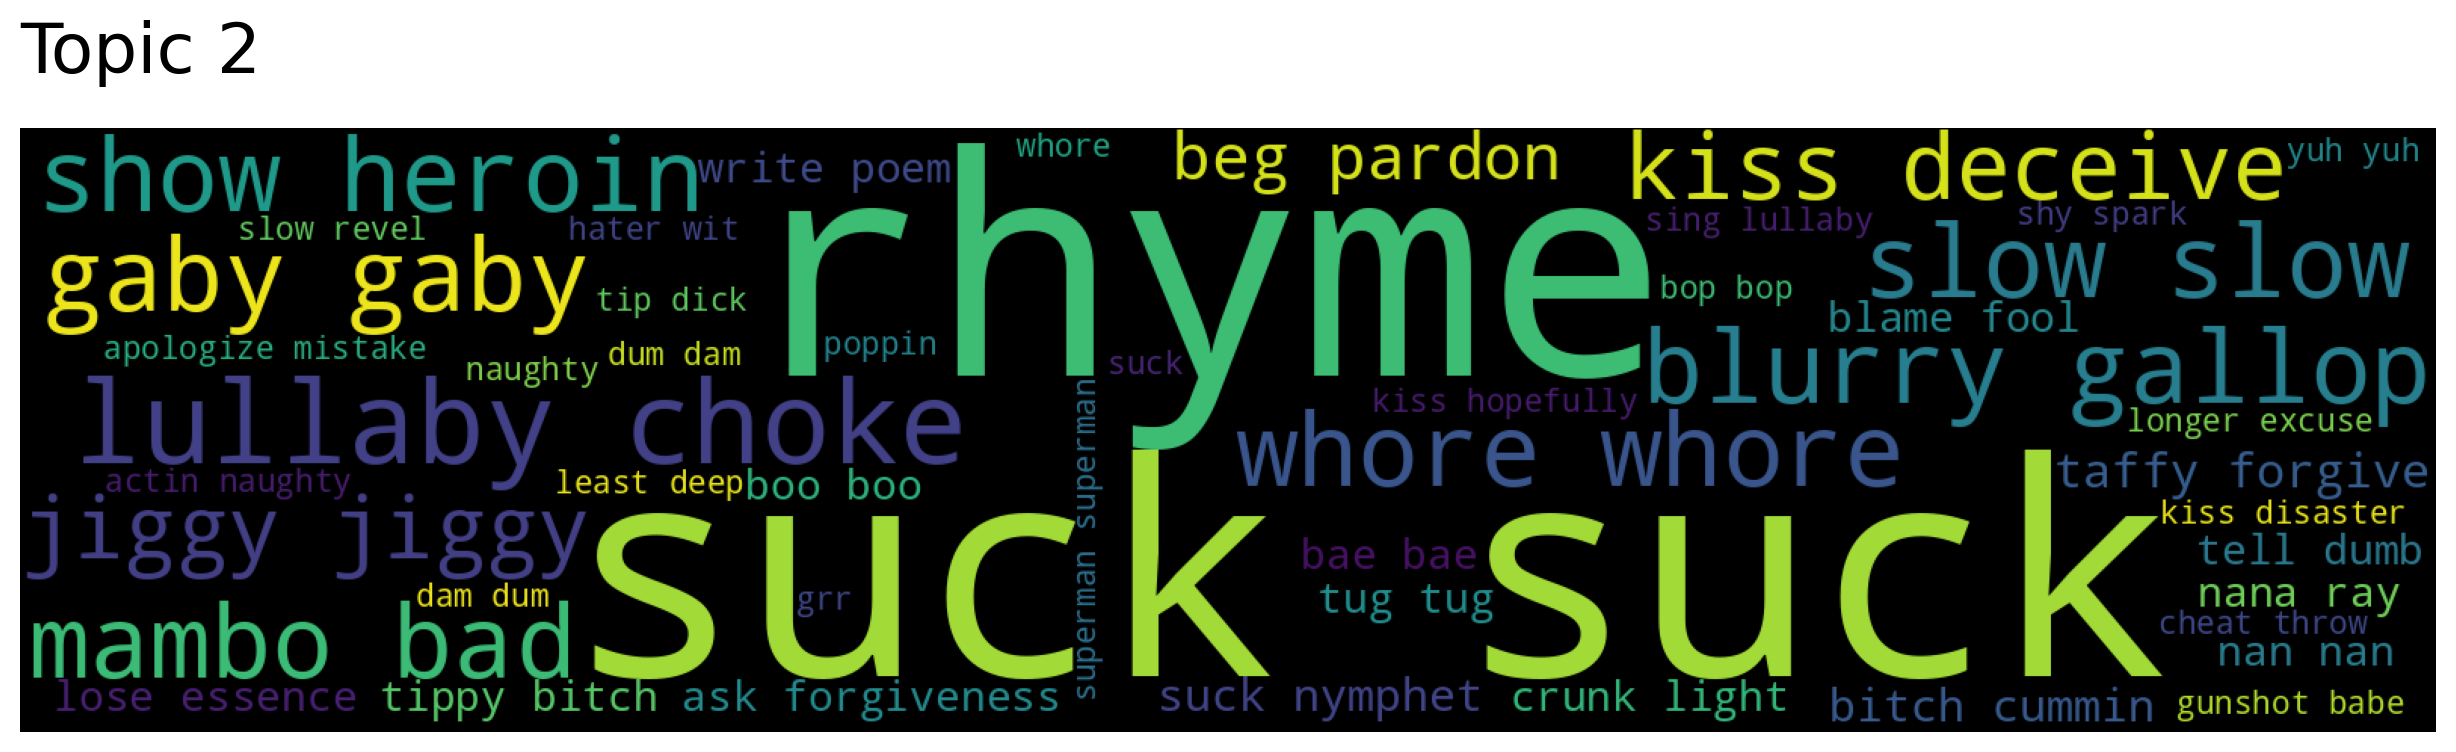

In [22]:
top2vec.generate_topic_wordcloud(2)

*Figure 5.10: Top2vec Topic 2 Top words*

In [72]:
#search for a sample topic 2 document
top2vec.search_documents_by_topic(2, num_docs=2)

(array(['tell want sleep havent able since leave hey get arrive think want forget another know go lie go lie walk think want forget want repeat baby lose go today saw wear pal gym baby real plastic put nit talk romantic think every day one change know screw relationship bad baby know fight rude thing county sea view wake day go fifty eight beach never think would last day baby active puppet motorboat let see see around hey get get get think erase another taste go lie go lie drink think want forget want repeat sound baby like anyone sin anyone sin tell want put today baby net want decide look look slow little dog finish inside need decide look look slow little dog finish inside give know give water thirsty today want invest spend spend substance three see ticket low might also like tell fall asleep havent able since leave hey get get get think erase another taste go lie go lie walk think want forget want repeat baby whoa go fifty eight beach never think would last day whoa',
        'te

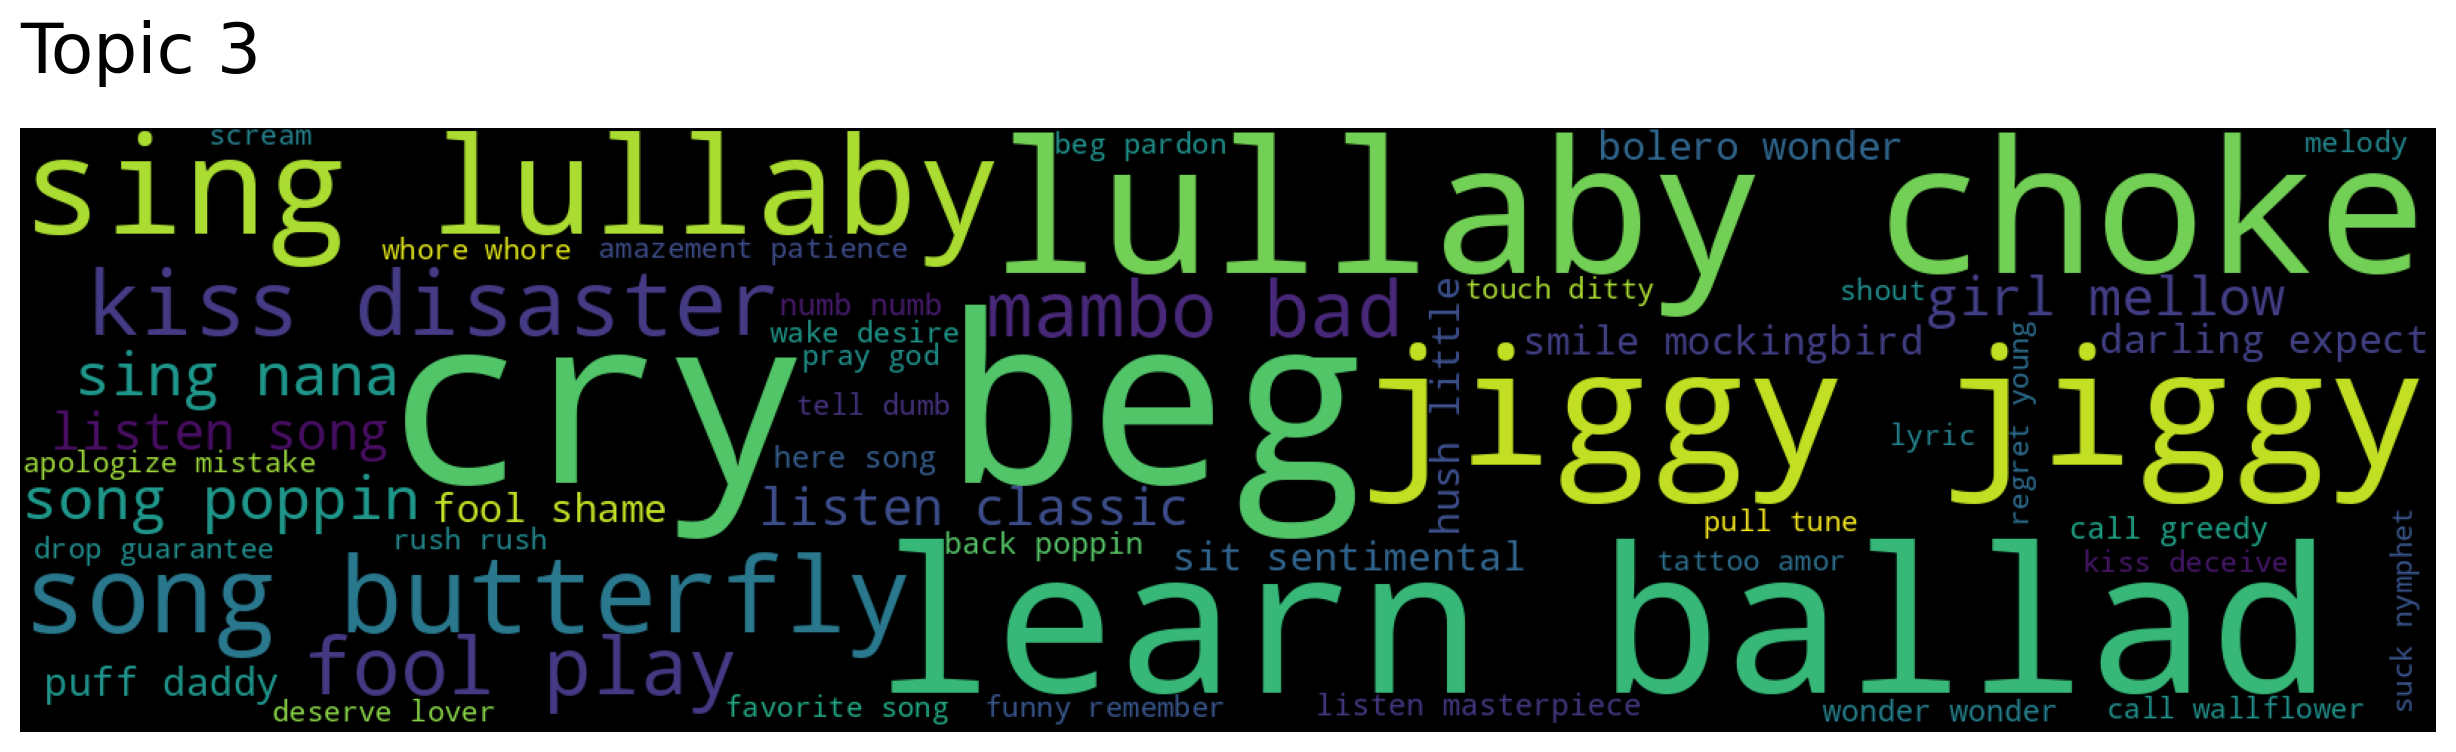

In [23]:
top2vec.generate_topic_wordcloud(3)

*Figure 5.11: Top2vec Topic 3 Top words*

In [73]:
#search for a sample topic 03 document
top2vec.search_documents_by_topic(3, num_docs=2)

(array(['money goal let head water pen leaf wet sock unstoppable continue sketcher nearby everyone van three day balloon puke like bottle guarantee cost press key sure floss stir fry hungry lie belly get fatter eat stew spit fire smoke businessman public transport pain lot misery safe anyway someone go dough ever look dough gunner donate think feel pain skeer think loot yes philosophize would tell know anyway sit come street ask cause sick time look many hit luckily wear face mask clap barrel jail escape long corona almost start fund rapper contact pin also cash coke would fall run home think baseball player boy pit make gap get present scene father day first one already hard second one go thing kick do much better keep head toe tight drive tight new valve measure know hot guy close road titty rain suit tenner little men brother know thing brother live already grab little little grab brother trifle get code little bitch neighborhood striker brother like drive boy run armor buy pipe bik

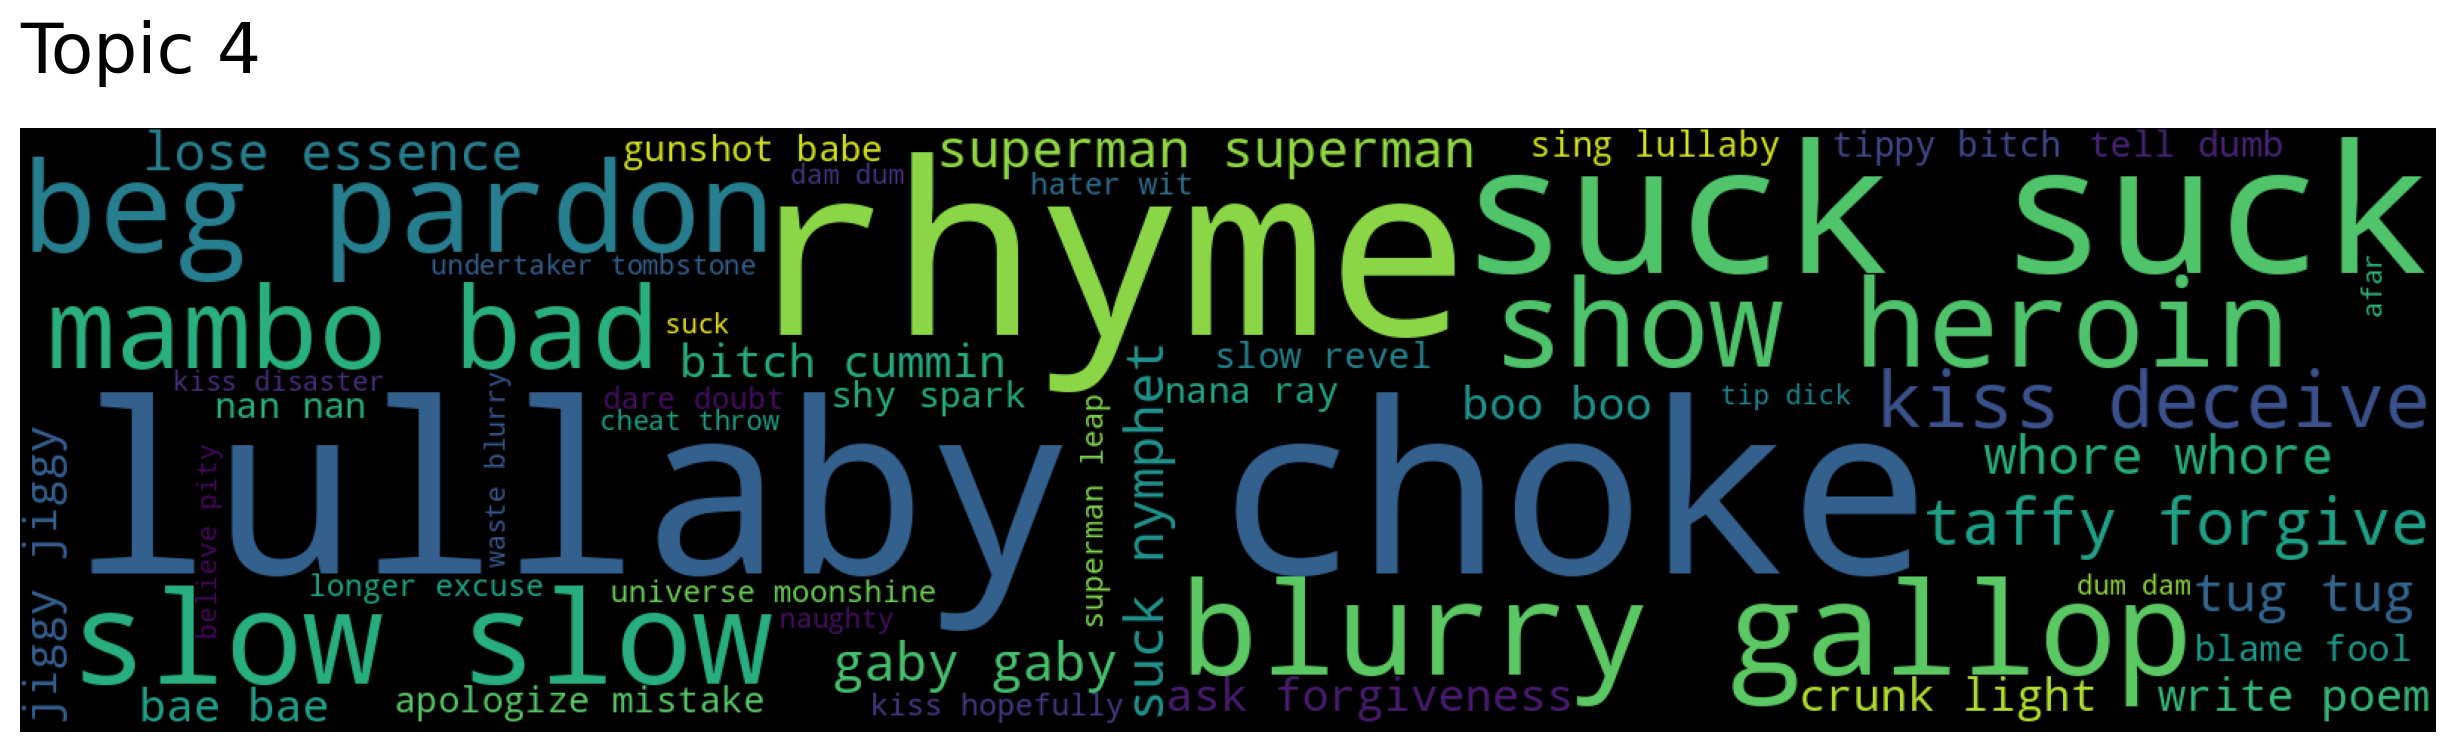

In [46]:
top2vec.generate_topic_wordcloud(4)

In [74]:
#search for a sample topic 4 document
top2vec.search_documents_by_topic(4, num_docs=2)

(array(['get hit house lick tell wit home invasion persuasive persuasive nine five know dream life like rapper like rapper back wrapper cool cool go tell tell usher let burn come let burn come hot sauce top park car start thing free mind free mind freeze verse see dollar sign see dollar sign like easy silver spoon know come never know never know reverend revenue berry hallelujah pick poison tell everybody gon respect shooter one front gun life forever one front gun forever canal alleyway say money tree perfect place shade feel dollar might main bitch feel dollar might say come feel dollar might make lane switch feel dollar might turn rich feel dream life like rapper like rapper new school way school know big earl rational rational rational back reality poor another casualty war two bullet uncle tony head tony head say one day tour never would belt never ease pain would ease pain purchase day jerkin day jerkin pull church gang sign window offend say hood pot gold pot gold gon crash nobo

*Figure 5.12: Top2vec Topic 4 Top words*

In [78]:
#Are there any topics about love? 
#search for topics using keywords
topic_words, word_scores, topic_scores, topic_nums = top2vec.search_topics(keywords=["love"], num_topics=2)
print(topic_words[0])
print(topic_words[1])

['deserve lover' 'amor' 'tear' 'heartbreak anniversary' 'cry beg'
 'scarf amor' 'lover fighter' 'heal wind' 'learn ballad' 'beat romance'
 'love' 'cry' 'tear drop' 'need lover' 'lover' 'heart adore'
 'teardrop fall' 'save tear' 'trouble sentimental' 'poem fall' 'tear use'
 'emotional cause' 'bonbon grape' 'heart lionheart' 'point cry'
 'mourn mourn' 'cry buy' 'tear apart' 'lionheart heart' 'stitch bae'
 'lullaby choke' 'wind caress' 'tear cheek' 'tattoo amor' 'hurt'
 'favorite song' 'heal' 'mary amor' 'wipe tear' 'taffy forgive'
 'crush heart' 'difficult cry' 'song sing' 'forgiveness rancor'
 'scooter scream' 'song poppin' 'kiss disaster' 'victim push'
 'forgive forgive' 'remix twice']
['amor' 'deserve lover' 'heart adore' 'scarf amor' 'kiss deceive'
 'tattoo amor' 'underground amor' 'closer whisper' 'love' 'heart flutter'
 'need lover' 'learn ballad' 'devotion deep' 'jiggy jiggy' 'trance sexy'
 'poem fall' 'wake desire' 'dance sensual' 'lullaby choke'
 'song butterfly' 'probably adore

In [90]:
#Are there any topics about hate? 
#search for topics using keywords
topic_words, word_scores, topic_scores, topic_nums = top2vec.search_topics(keywords=["hate"], num_topics=2)
print(topic_words[0])
print(topic_words[1])

['everybody stare' 'gloomy face' 'exhaust always' 'envy silent'
 'glance spiteful' 'hide emotion' 'narcissism disguise' 'spiteful crazy'
 'silent burden' 'crazy daydream' 'madness begin' 'howl pajama'
 'wake desire' 'wake scream' 'scream' 'ignore sun' 'everybody problem'
 'silent attention' 'moonlight sunrise' 'frown' 'devilish smile'
 'sometimes silence' 'darkness find' 'anger wind' 'spiteful'
 'face daylight' 'exhaust' 'scream laugh' 'sorrow begin' 'hide repress'
 'sunrise moonlight' 'bile bile' 'madness' 'happy hate' 'mirror mirror'
 'stare' 'pull tune' 'call greedy' 'ordinary danger' 'want riddle'
 'turn headlight' 'feel rebellious' 'paranoia cause' 'mirror road'
 'antihero' 'hater wit' 'narcissism' 'ignore' 'lose snooze'
 'outburst crazy']
['cry beg' 'heartless could' 'wait patiently' 'cry buy' 'cry'
 'believe pity' 'sade regret' 'difficult cry' 'leave remorse'
 'decision feel' 'sad aware' 'fool shame' 'heartless' 'could heartless'
 'regret pray' 'regret courage' 'shame fool' 'reg

In [80]:
#Are there any topics about race? 
#search for topics using keywords
topic_words, word_scores, topic_scores, topic_nums = top2vec.search_topics(keywords=["race"], num_topics=2)
print(topic_words[0])
print(topic_words[1])

['jiggy jiggy' 'poppin' 'song poppin' 'feat nicky' 'kiss hopefully'
 'back poppin' 'mambo bad' 'must hustle' 'show heroin' 'rah rah' 'weekend'
 'kiss deceive' 'guess slut' 'favorite tune' 'nicky jam' 'night funk'
 'moony tune' 'make rowdy' 'wonder wonder' 'dum dam' 'universe moonshine'
 'rhyme' 'crunk light' 'sex repeat' 'trance sexy' 'funk funk' 'rah'
 'anything wah' 'puff daddy' 'suck nymphet' 'lullaby choke' 'funk'
 'contagious dope' 'dead rave' 'bae bae' 'suck suck' 'darling expect'
 'remix ultra' 'bet levitate' 'remix monte' 'rain bop' 'mine bonbon'
 'finer' 'hopefully' 'funny remember' 'moonlight tequila' 'polish wish'
 'shoot dope' 'dope dope' 'top gra']
['song poppin' 'lullaby choke' 'rain bop' 'jiggy jiggy' 'sing lullaby'
 'poppin' 'teardrop fall' 'sing toto' 'mambo bad' 'moony tune' 'dum dam'
 'rhyme' 'listen song' 'feat nicky' 'puff daddy' 'learn ballad' 'toto'
 'wish heather' 'naughty desire' 'beg pardon' 'poem fall' 'sha sha'
 'song butterfly' 'moonlight tequila' 'favorite

In [82]:
#Are there any topics about laws? 
#search for topics using keywords
topic_words, word_scores, topic_scores, topic_nums = top2vec.search_topics(keywords=["law"], num_topics=2)
print(topic_words[0])
print(topic_words[1])

['lie congratulate' 'suit congratulate' 'well act' 'act'
 'congratulate congratulate' 'well congratulate' 'congratulate'
 'band congratulate' 'behave badly' 'fool claim' 'sincere' 'fool play'
 'kiss deceive' 'trick feint' 'fool shame' 'behave' 'owe act' 'cry beg'
 'sit humbly' 'smile mockingbird' 'magical act' 'behave pretty'
 'laugh willy' 'tell dumb' 'sound sincere' 'ring sing' 'lie truly'
 'continue show' 'sing' 'listen legend' 'smile prick' 'raise suspicion'
 'fail moan' 'celebrate' 'act revenge' 'catch layer' 'pull celebrate'
 'realize well' 'sing hallelujah' 'admit mistake' 'sit cock'
 'apologize mistake' 'clap back' 'sing ring' 'sick fake' 'fool' 'lie'
 'sell sincere' 'cheat law' 'slap slap']
['everybody stare' 'gloomy face' 'exhaust always' 'envy silent'
 'glance spiteful' 'hide emotion' 'narcissism disguise' 'spiteful crazy'
 'silent burden' 'crazy daydream' 'madness begin' 'howl pajama'
 'wake desire' 'wake scream' 'scream' 'ignore sun' 'everybody problem'
 'silent attention'

In [86]:
#Are there any topics about family? 
#search for topics using keywords
topic_words, word_scores, topic_scores, topic_nums = top2vec.search_topics(keywords=["family"], num_topics=2)
print(topic_words[0])
print(topic_words[1])

['stitch bae' 'lullaby choke' 'bleed death' 'cry beg' 'lyric'
 'babe darling' 'sing lullaby' 'jiggy jiggy' 'suck savage' 'learn ballad'
 'hater wit' 'suck suck' 'suck nymphet' 'bae bae' 'tear drop' 'sing nana'
 'poppin' 'babe' 'scratch yell' 'stick deadbeat' 'gon respond'
 'turn unfaithful' 'baby uncontrollable' 'whore whore' 'squeal squeal'
 'yam yam' 'suck smash' 'mush yeah' 'song poppin' 'bleed' 'hater'
 'gush bleed' 'closer whisper' 'plan bleed' 'play bae' 'mere mere'
 'knit knit' 'accelerate heartbeat' 'nan nan' 'bae' 'cut bleed' 'sha sha'
 'monotonous rhythm' 'bear whoa' 'babe rock' 'cry' 'fragile fragile'
 'push pus' 'die green' 'amor']
['heart lionheart' 'lionheart heart' 'heartless' 'could heartless'
 'heartless could' 'heart harder' 'heart adore' 'heart flutter' 'heart'
 'woman heartless' 'lullaby choke' 'snap snap' 'lyric' 'cry beg'
 'heartbeat' 'song poppin' 'accelerate heartbeat' 'dishevel heart'
 'heartbreak anniversary' 'sing lullaby' 'crush heart' 'jiggy jiggy'
 'poppin

In [92]:
#Are there any topics about guns? 
#search for topics using keywords
topic_words, word_scores, topic_scores, topic_nums = top2vec.search_topics(keywords=["gun"], num_topics=2)
print(topic_words[0])
print(topic_words[1])

['thug live' 'thug' 'young thug' 'sneaker thug' 'pussy chopper'
 'cardboard thug' 'die rather' 'run motorcycle' 'thug shooter'
 'buy mockingbird' 'cut dope' 'fag blow' 'run away' 'make rowdy'
 'rob gangster' 'hood jump' 'wick wack' 'run bulletproof' 'shoot dope'
 'try backfire' 'stay alarm' 'addict footprint' 'please disown' 'go thin'
 'suck nymphet' 'ride dink' 'scooter scream' 'feel rebellious' 'wrap bye'
 'bone crank' 'poppin' 'pistol poppin' 'gangster' 'touch yell'
 'swish ignition' 'buy zip' 'shy spark' 'jump jump' 'snooze miss'
 'slap slap' 'idiot dead' 'sheriff crazy' 'addict gamble' 'move slow'
 'wake desire' 'suck savage' 'gang murder' 'gunshot babe' 'shady chop'
 'wake scream']
['bad memory' 'forgetfulness happen' 'will liquor' 'mambo bad' 'crash huh'
 'brain' 'lose' 'sing toto' 'funny remember' 'lose control' 'head'
 'drink rum' 'shoot tequila' 'lullaby choke' 'alcohol confess'
 'brain brainwash' 'lose due' 'tequila' 'head blast' 'drink alcohol'
 'mix tequila' 'toto' 'beer m

In [100]:
#Are there any topics about guns? 
#search for topics using keywords
topic_words, word_scores, topic_scores, topic_nums = top2vec.search_topics(keywords=["violence"], num_topics=2)
print(topic_words[0])
print(topic_words[1])

['tear drop' 'cry beg' 'deserve lover' 'amor' 'heartbreak anniversary'
 'torment slap' 'fade fade' 'scratch yell' 'teardrop fall' 'hit hit'
 'point cry' 'find ugly' 'drop drop' 'jaw drop' 'love' 'tattoo amor'
 'yell yell' 'poem fall' 'stupid slap' 'kiss disaster' 'slap slap'
 'learn ballad' 'touch yell' 'crush heart' 'slap' 'tear' 'cry'
 'need lover' 'scream' 'save tear' 'tear cheek' 'heart adore'
 'hide emotion' 'break bully' 'drop' 'closer whisper' 'scarf amor'
 'disappear unthinkable' 'yell unknown' 'tear describe' 'yell' 'run away'
 'violence alright' 'hug hug' 'kiss deceive' 'violence' 'smack smack'
 'abuse loop' 'accelerate heartbeat' 'bleed death']
['keep silent' 'sit humbly' 'yell yell' 'yell unknown' 'sit cock'
 'cry beg' 'call greedy' 'touch yell' 'keep quiet' 'hide repress'
 'scratch yell' 'hide emotion' 'wait patiently' 'call wallflower'
 'sit sidewalk' 'yell' 'sit' 'suck nymphet' 'make rowdy' 'shut shut'
 'flag listen' 'scream' 'hide' 'listen classic' 'poppin' 'sit sentime

There are no topics about religion, politics, gender, education,marriage, justice

In [98]:
#query documents based on given text input
documents, doc_scores, doc_ids = top2vec.query_documents('gun policy in the US', num_docs=2)
print(documents[0]) #first doc


timon dope weapon iron flesh bone need lay hand already child use bigger one swear would rather take say everything fine glory say studio twenty air become tense problem weve already understand account banca card full debt unlimited two eighty run touch limit business hope delivery well batman pebble cellophane parcel thank god make know would around see use get way might also like dope weapon hooligan casino cousin deal dope weapon


In [108]:
#query documents based on given text input
documents, doc_scores, doc_ids = top2vec.query_documents('transgender', num_docs=2)
print(documents[0]) #first doc
print(documents[1]) 

yeah tomboy look handle take hook yeah mood coke like look toe name tattoo get drink hate cranky boy frown want blonde doll doll idle til call crazy kite whats loss yeah try without mercy lose yeah yeah there single scar body like love rather rotten perfume yeah tomboy yeah tomboy attitude yeah tomboy play would rather film raise prince queendom right like dance love friend sometimes wear without cigarette like drink whiskey would change hell see ticket low might also like say crazy whats loss yeah chew without mercy lose yeah yeah like love there even single tear eye want smile trivial word yeah tomboy yeah tomboy attitude yeah tomboy say get get song right get mean tomboy ready yeah three two one neither man woman man woman neither man woman idle neither man woman man woman neither man woman love tomboy
seem take eye especially python move way hold thing wan hold thing baby let take look lord want girl whole world know wrong since man focus definitely give say know get say know get w

In [104]:
#query documents based on given text input
documents, doc_scores, doc_ids = top2vec.query_documents('social injustice', num_docs=2)
print(documents[0]) #first doc
print(documents[1]) 

matter game come tell amount win panama nail hand yes know divider plot say get bag even distribution home game house style three knock nothing push lot upside want come yes always ready game game yeah wait come life behind even whole city somewhere life account balance demon taxman whatever say day come soon tell queen city belong street whole team go make progress take everything lose last year please give motive accord language police know burden many year limbo limbo game king king couple demon enemy miss lady make move except grip feel like feel like one lady enough need hoe also put bulk skinny tho gang lot flow start always dope give everything could even didnt work try know wouldnt end market five oclock get source first cross line waste time much could fool anything school end never warm anywhere game didnt even pellet go hard find chemistry might also like day come soon tell queen city belong street whole team go make progress take everything lose last year please give motive

In [111]:
#query documents based on given text input
documents, doc_scores, doc_ids = top2vec.query_documents('abortion rights', num_docs=2)
print(documents[0]) #first doc

tell love love exist ugh ugh ugh see think would fall love anyone want see side baby free want baby completely want baby want see side baby free baby love one two want baby want see side baby free baby love one two want baby want baby want baby want baby want baby want see side baby free want baby completely want baby want baby want baby want baby want baby forget love ala afraid confess simply smoke cigarette understand much hell look exit vain picture might also like


In [107]:
#query documents based on given text input
documents, doc_scores, doc_ids = top2vec.query_documents('higher education', num_docs=2)
print(documents[0]) #first doc
print(documents[1]) 

hood jump get high murder mane time hood jump get high murder mane time hood jump get high hood jump get high hood jump get high hood jump get high hood jump get high murder mane time hood jump get high murder mane hood jump high hood jump get high hood jump get high hood jump get high hood jump get high murder mane time hood jump get high murder mane time hood jump get high murder mane time hood jump get high murder mane time hood jump get high hood jump get high hood jump get high hood jump get might also like
superior crown clave whatever long get even cool get storm subside say youd come back wait decide find whatever take although endless highway even come run take come fence stair superior nothing else shoe scatter heart burn mark map superior superior down whatever thousand time bigger might also like last light path make move forward everything else leave behind set fire although endless highway even come run take come fence stair superior nothing else shoe scatter heart burn m